In [143]:
#import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [144]:
df=pd.read_csv('insurance.csv')
pd.set_option('display.max_columns', None)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

_c39 has null values so we can drop this

In [146]:
df['_c39'].value_counts()

Series([], Name: _c39, dtype: int64)

In [147]:
df.drop(['_c39'],axis=1,inplace=True)

In [148]:
df.drop(['policy_number'],axis=1,inplace=True)

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

<AxesSubplot:>

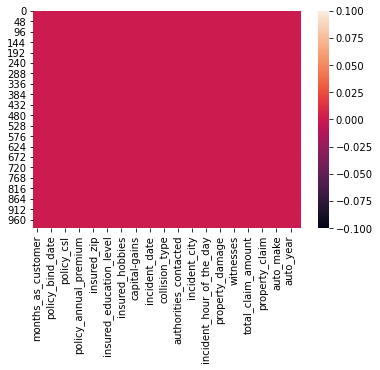

In [149]:
print(df.isnull().sum())
sns.heatmap(df.isnull())

no missing values are there

there are special charecters filled in the data, let us find and replace them

In [150]:
def check(column):
    t=df[column].dtype
    if t=='object':
        sns.countplot(df[column],hue=df['fraud_reported'])
        print(f'unique values in {column} is:',df[column].nunique())
        print(f'unique values in {column} is:',df[column].value_counts())
    else:
        print(f'Brief of {column}:',df[column].describe())
        sns.boxplot(df[column],orient='v')
        print('skewness:',df[column].skew())
        print(f'unique values count in {column}:',df[column].nunique())
    return

Brief of months_as_customer: count    1000.000000
mean      203.954000
std       115.113174
min         0.000000
25%       115.750000
50%       199.500000
75%       276.250000
max       479.000000
Name: months_as_customer, dtype: float64
skewness: 0.3621768477780205
unique values count in months_as_customer: 391


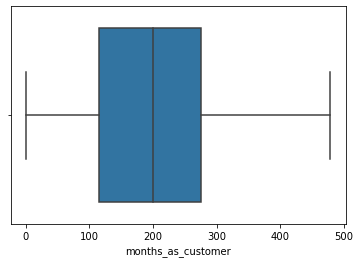

In [151]:
check('months_as_customer')

we can see in average customer is from 204 months and least of 0 months. 75% customers are less than 276 months there are no outliers,also skewness is in range.

Brief of age: count    1000.000000
mean       38.948000
std         9.140287
min        19.000000
25%        32.000000
50%        38.000000
75%        44.000000
max        64.000000
Name: age, dtype: float64
skewness: 0.47898804709224163
unique values count in age: 46


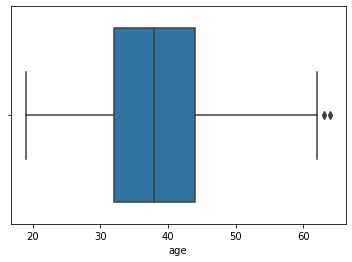

In [152]:
check('age')

Min age of client is 19 years, max age is 64. few outliers are present, 50% of the clients are less than age of 38

In [153]:
#deriving required columns and drop the original column
df['policy_year']=pd.to_datetime(df['policy_bind_date']).dt.year

df['policy_day']=pd.to_datetime(df['policy_bind_date']).dt.day

df['policy_month']=pd.to_datetime(df['policy_bind_date']).dt.month

#dropping the column 
df.drop('policy_bind_date',axis=1,inplace=True)

In [154]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported', 'policy_year', 'policy_day',
       'policy_month'],
      dtype='object')

unique values in policy_state is: 3
unique values in policy_state is: OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


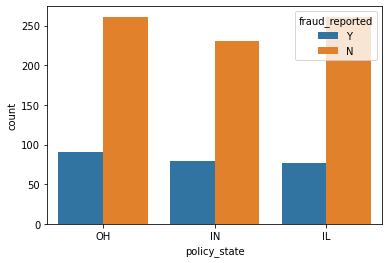

In [155]:
check('policy_state')

There are 3 policy states, OH,IN, IL - and fraud cases in each state. More policies are in state OH , high % of fraud cases in state OH. let us encode this column

In [156]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['policy_state']=le.fit_transform(df['policy_state'])

In [157]:
df['policy_state'].value_counts()

2    352
0    338
1    310
Name: policy_state, dtype: int64

unique values in policy_csl is: 3
unique values in policy_csl is: 250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


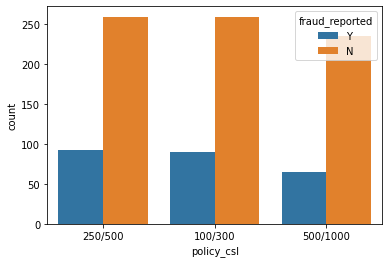

In [158]:
check('policy_csl')

Brief of policy_deductable: count    1000.000000
mean     1136.000000
std       611.864673
min       500.000000
25%       500.000000
50%      1000.000000
75%      2000.000000
max      2000.000000
Name: policy_deductable, dtype: float64
skewness: 0.4778872137362794
unique values count in policy_deductable: 3


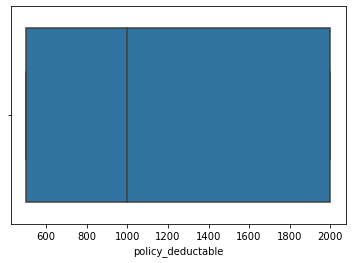

In [159]:
check('policy_deductable')

Brief of policy_annual_premium: count    1000.000000
mean     1256.406150
std       244.167395
min       433.330000
25%      1089.607500
50%      1257.200000
75%      1415.695000
max      2047.590000
Name: policy_annual_premium, dtype: float64
skewness: 0.004401994526610823
unique values count in policy_annual_premium: 991


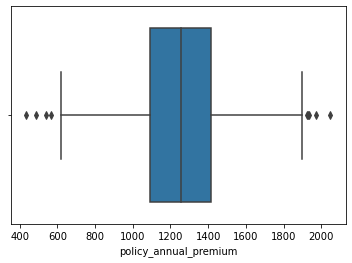

In [160]:
check('policy_annual_premium')

there are some outliers in the premium amount. It is normally distributed.Max. premium amount is 2047

Brief of umbrella_limit: count    1.000000e+03
mean     1.101000e+06
std      2.297407e+06
min     -1.000000e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+07
Name: umbrella_limit, dtype: float64
skewness: 1.806712198714504
unique values count in umbrella_limit: 11


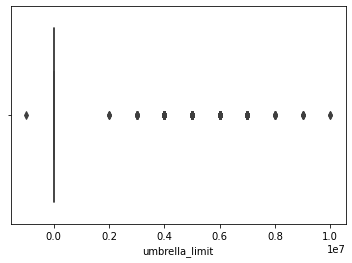

In [161]:
check('umbrella_limit')

skewness is more, outliers are present

Brief of insured_zip: count      1000.000000
mean     501214.488000
std       71701.610941
min      430104.000000
25%      448404.500000
50%      466445.500000
75%      603251.000000
max      620962.000000
Name: insured_zip, dtype: float64
skewness: 0.8165539258839357
unique values count in insured_zip: 995


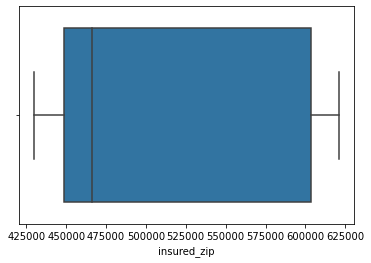

In [162]:
check('insured_zip')

this is the zip code of location . we doesnt need this column.

In [163]:
df.drop('insured_zip',axis=1,inplace=True)

unique values in insured_sex is: 2
unique values in insured_sex is: FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


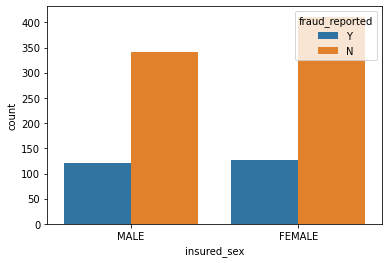

In [164]:
check('insured_sex')

Males are more customers and claimed more fraud than female

In [165]:
df['insured_sex']=le.fit_transform(df['insured_sex'])

unique values in insured_education_level is: 7
unique values in insured_education_level is: JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


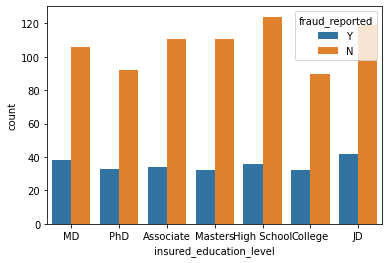

In [166]:
check('insured_education_level')

<AxesSubplot:xlabel='count', ylabel='insured_education_level'>

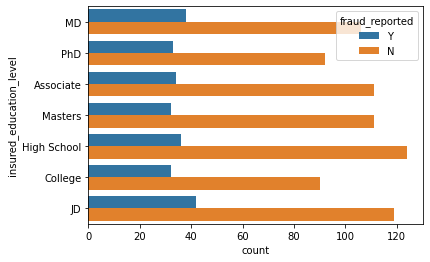

In [167]:
sns.countplot(y=df['insured_education_level'],hue=df['fraud_reported'])

In [168]:
df['insured_education_level']=le.fit_transform(df['insured_education_level'])

unique values in insured_occupation is: 14
unique values in insured_occupation is: machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


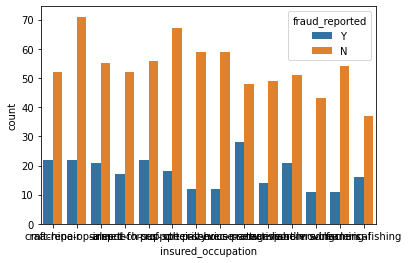

In [169]:
check('insured_occupation')

<AxesSubplot:xlabel='count', ylabel='insured_occupation'>

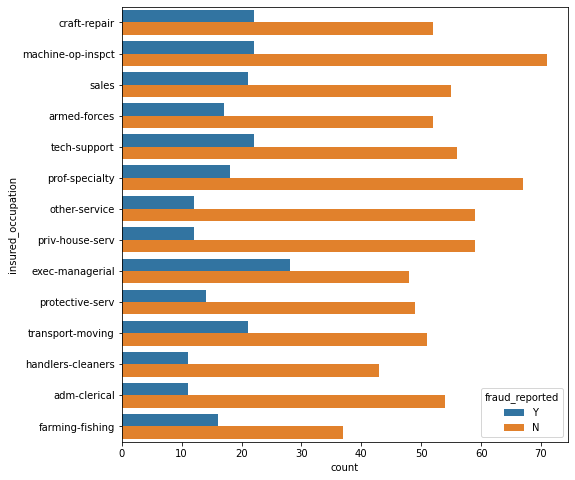

In [170]:
plt.figure(figsize=(8,8))
sns.countplot(y=df['insured_occupation'],hue=df['fraud_reported'])

In [171]:
df['insured_occupation']=le.fit_transform(df['insured_occupation'])

unique values in insured_hobbies is: 20
unique values in insured_hobbies is: reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
camping           55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


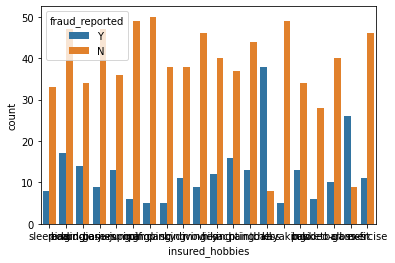

In [172]:
check('insured_hobbies')

<AxesSubplot:xlabel='count', ylabel='insured_hobbies'>

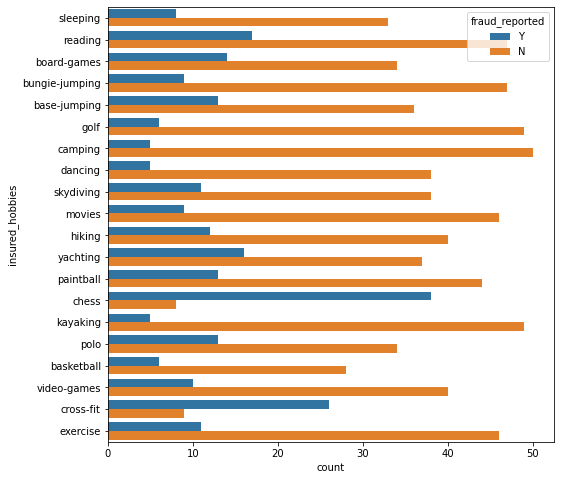

In [173]:
plt.figure(figsize=(8,8))
sns.countplot(y=df['insured_hobbies'],hue=df['fraud_reported'])

In [174]:
df['insured_hobbies']=le.fit_transform(df['insured_hobbies'])

unique values in insured_relationship is: 6
unique values in insured_relationship is: own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


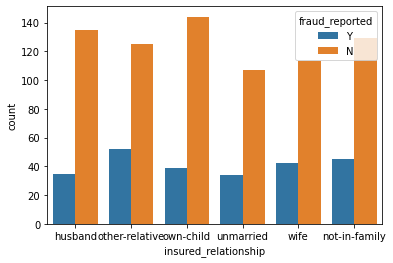

In [175]:
check('insured_relationship')

In [176]:
df['insured_relationship']=le.fit_transform(df['insured_relationship'])

Brief of capital-gains: count      1000.000000
mean      25126.100000
std       27872.187708
min           0.000000
25%           0.000000
50%           0.000000
75%       51025.000000
max      100500.000000
Name: capital-gains, dtype: float64
skewness: 0.4788502295807907
unique values count in capital-gains: 338


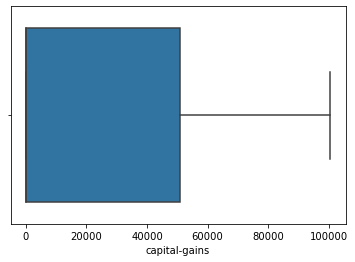

In [177]:
check('capital-gains')

acceptable skewness,no outliers, max. gain of 100500 and min of 0

Brief of capital-loss: count      1000.000000
mean     -26793.700000
std       28104.096686
min     -111100.000000
25%      -51500.000000
50%      -23250.000000
75%           0.000000
max           0.000000
Name: capital-loss, dtype: float64
skewness: -0.39147194299389343
unique values count in capital-loss: 354


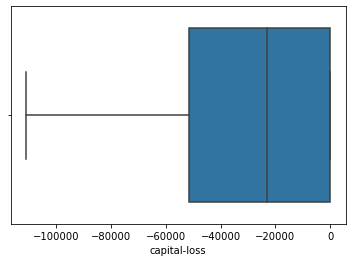

In [178]:
check('capital-loss')

loss itself tends -ve, the values in the column are in negative,let us make them possitive

In [179]:
df['capital-loss']=abs(df['capital-loss'])

Brief of capital-loss: count      1000.000000
mean      26793.700000
std       28104.096686
min           0.000000
25%           0.000000
50%       23250.000000
75%       51500.000000
max      111100.000000
Name: capital-loss, dtype: float64
skewness: 0.39147194299389343
unique values count in capital-loss: 354


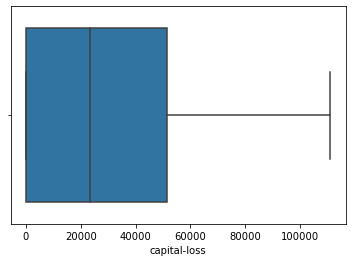

In [180]:
check('capital-loss')

unique values in incident_date is: 60
unique values in incident_date is: 02-02-2015    28
17-02-2015    26
07-01-2015    25
24-01-2015    24
04-02-2015    24
10-01-2015    24
19-01-2015    23
08-01-2015    22
30-01-2015    21
13-01-2015    21
31-01-2015    20
06-02-2015    20
12-02-2015    20
22-02-2015    20
23-02-2015    19
14-01-2015    19
21-02-2015    19
21-01-2015    19
12-01-2015    19
01-01-2015    19
18-01-2015    18
25-02-2015    18
20-01-2015    18
14-02-2015    18
03-01-2015    18
28-02-2015    18
01-02-2015    18
09-01-2015    17
08-02-2015    17
06-01-2015    17
26-02-2015    17
24-02-2015    17
05-02-2015    16
13-02-2015    16
16-01-2015    16
15-02-2015    16
16-02-2015    16
18-02-2015    15
15-01-2015    15
17-01-2015    15
28-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
09-02-2015    13
03-02-2015    13
27-01-2015    13
01-03-2015    12
04-01-2015    12
02-01-2015    11
29-01-2015    11
26-01-2015    11
10-02-2015    10
19-02-201

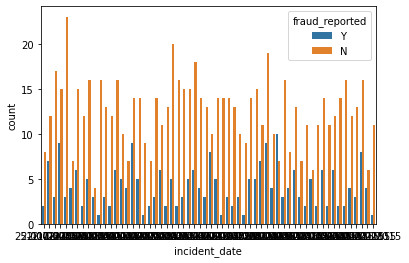

In [181]:
check('incident_date')

majority incidents occured in 2015. this doesn't play any role and also only one year.. so we can drop this column

In [182]:
df.drop('incident_date',axis=1,inplace=True)

unique values in incident_type is: 4
unique values in incident_type is: Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


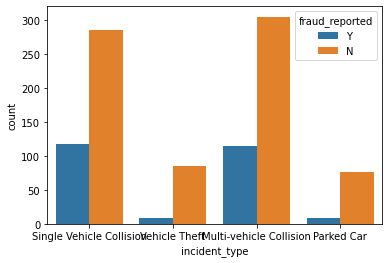

In [183]:
check('incident_type')

In [184]:
df['incident_type']=le.fit_transform(df['incident_type'])

unique values in collision_type is: 4
unique values in collision_type is: Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


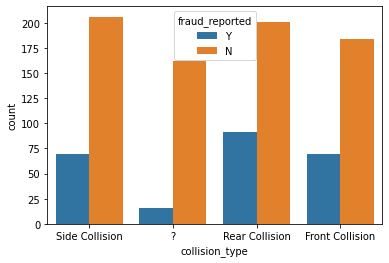

In [185]:
check('collision_type')

there is a ? in the values, all the collisions are covered,might be not entered .so let us fill that with mode .. i.e rear collision

In [186]:
df['collision_type'].replace('?','Rear Collision',inplace=True)

unique values in collision_type is: 3
unique values in collision_type is: Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


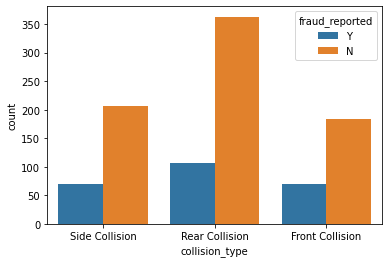

In [187]:
check('collision_type')

In [188]:
df['collision_type']=le.fit_transform(df['collision_type'])

unique values in incident_severity is: 4
unique values in incident_severity is: Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


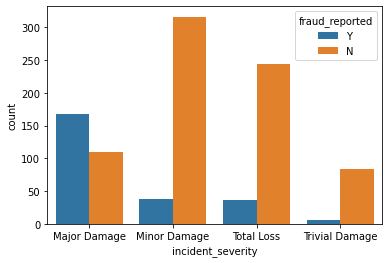

In [189]:
check('incident_severity')

In [190]:
df['incident_severity']=le.fit_transform(df['incident_severity'])

unique values in authorities_contacted is: 5
unique values in authorities_contacted is: Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


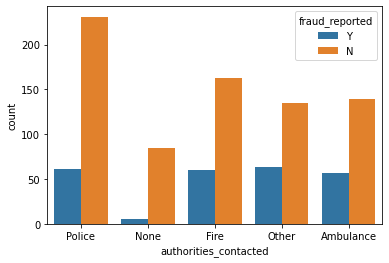

In [191]:
check('authorities_contacted')

In [192]:
df['authorities_contacted']=le.fit_transform(df['authorities_contacted'])

unique values in incident_state is: 7
unique values in incident_state is: NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64


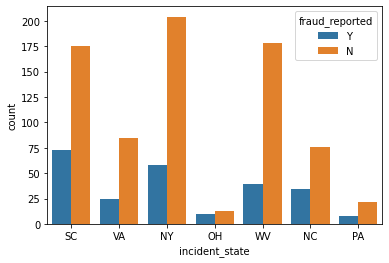

In [193]:
check('incident_state')

In [194]:
df['incident_state']=le.fit_transform(df['incident_state'])

unique values in incident_city is: 7
unique values in incident_city is: Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


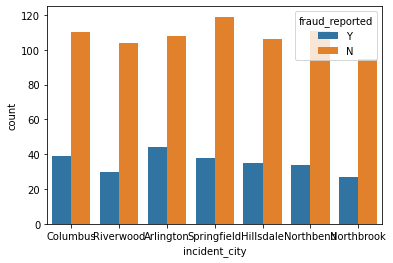

In [195]:
check('incident_city')

we already had state detail of incident, so this column might get multicolinearity issue

In [196]:
df['incident_city']=le.fit_transform(df['incident_city'])

In [197]:
df['incident_location'].nunique()

1000

1000 unique locations, since we have state and city details, we can drop this column

In [198]:
df.drop('incident_location',axis=1,inplace=True)

Brief of incident_hour_of_the_day: count    1000.000000
mean       11.644000
std         6.951373
min         0.000000
25%         6.000000
50%        12.000000
75%        17.000000
max        23.000000
Name: incident_hour_of_the_day, dtype: float64
skewness: -0.03558446643823673
unique values count in incident_hour_of_the_day: 24


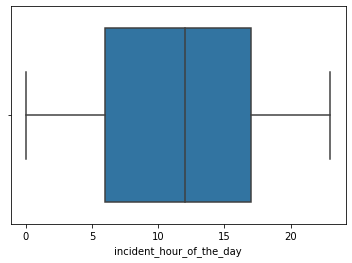

In [199]:
check('incident_hour_of_the_day')

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

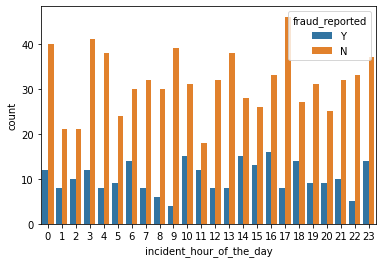

In [200]:
sns.countplot(df['incident_hour_of_the_day'],hue=df['fraud_reported'])

Brief of number_of_vehicles_involved: count    1000.00000
mean        1.83900
std         1.01888
min         1.00000
25%         1.00000
50%         1.00000
75%         3.00000
max         4.00000
Name: number_of_vehicles_involved, dtype: float64
skewness: 0.502664087487584
unique values count in number_of_vehicles_involved: 4


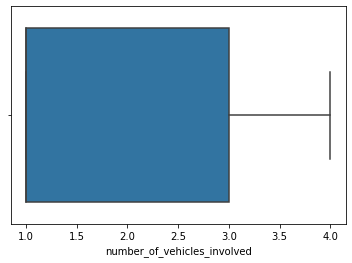

In [201]:
check('number_of_vehicles_involved')

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

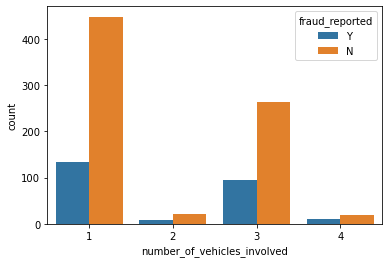

In [202]:
sns.countplot(df['number_of_vehicles_involved'],hue=df['fraud_reported'])

unique values in property_damage is: 3
unique values in property_damage is: ?      360
NO     338
YES    302
Name: property_damage, dtype: int64


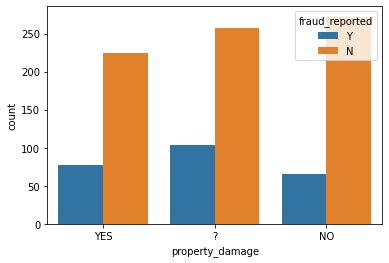

In [203]:
check('property_damage')

? has the more fraudulent climes, i.e it must be having property damage in report.So replace the ? with Yes

In [204]:
df['property_damage']=df['property_damage'].replace('?','YES')

unique values in property_damage is: 2
unique values in property_damage is: YES    662
NO     338
Name: property_damage, dtype: int64


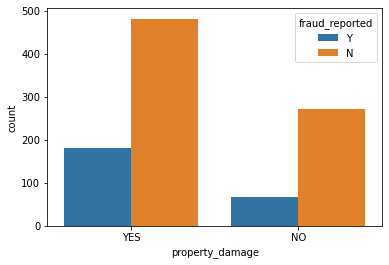

In [205]:
check('property_damage')

In [206]:
df['property_damage']=le.fit_transform(df['property_damage'])

Brief of bodily_injuries: count    1000.000000
mean        0.992000
std         0.820127
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: bodily_injuries, dtype: float64
skewness: 0.014777103511243209
unique values count in bodily_injuries: 3


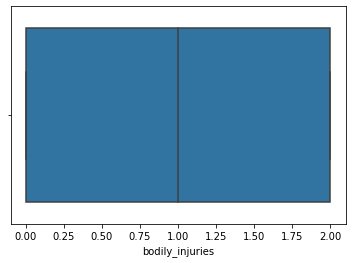

In [207]:
check('bodily_injuries')

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

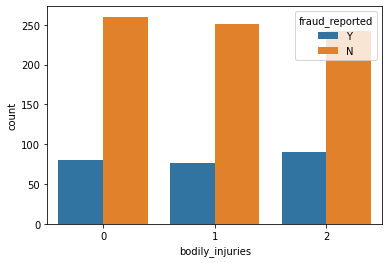

In [208]:
sns.countplot(df['bodily_injuries'],hue=df['fraud_reported'])

Brief of witnesses: count    1000.000000
mean        1.487000
std         1.111335
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: witnesses, dtype: float64
skewness: 0.019636419856529662
unique values count in witnesses: 4


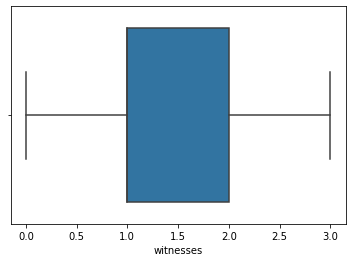

In [209]:
check('witnesses')

<AxesSubplot:xlabel='witnesses', ylabel='count'>

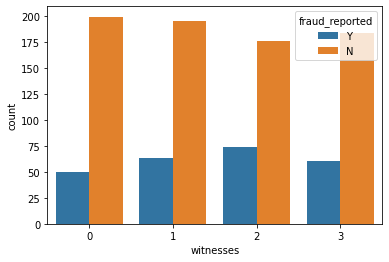

In [210]:
sns.countplot(df['witnesses'],hue=df['fraud_reported'])

unique values in police_report_available is: 3
unique values in police_report_available is: NO     343
?      343
YES    314
Name: police_report_available, dtype: int64


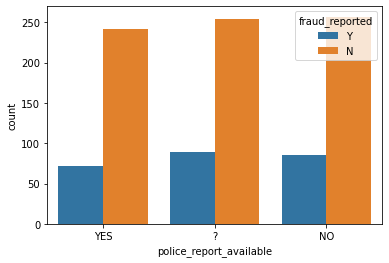

In [211]:
check('police_report_available')

In [212]:
df['police_report_available'].replace('?','NO',inplace=True)

unique values in police_report_available is: 2
unique values in police_report_available is: NO     686
YES    314
Name: police_report_available, dtype: int64


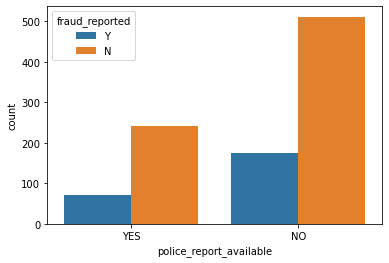

In [213]:
check('police_report_available')

In [214]:
df['police_report_available']=le.fit_transform(df['police_report_available'])

Brief of total_claim_amount: count      1000.00000
mean      52761.94000
std       26401.53319
min         100.00000
25%       41812.50000
50%       58055.00000
75%       70592.50000
max      114920.00000
Name: total_claim_amount, dtype: float64
skewness: -0.594581988510234
unique values count in total_claim_amount: 763


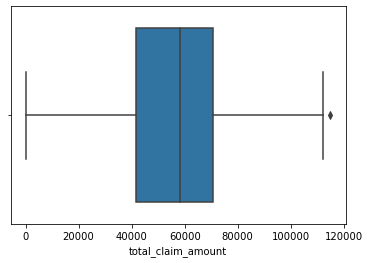

In [215]:
check('total_claim_amount')

unique values in auto_make is: 14
unique values in auto_make is: Saab          80
Suburu        80
Dodge         80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


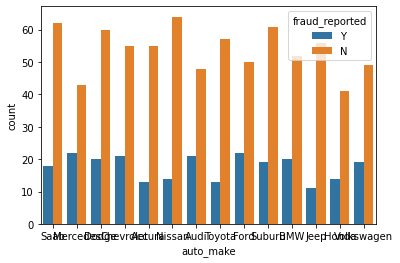

In [216]:
check('auto_make')

There are different types of cars insured.Frauds are dependent on mentality of person not wrt to car. so we can drop this column

In [217]:
df.drop('auto_make',axis=1,inplace=True)

unique values in auto_model is: 39
unique values in auto_model is: RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
Legacy            32
A5                32
Pathfinder        31
Malibu            30
Camry             28
92x               28
Forrestor         28
95                27
E400              27
F150              27
Grand Cherokee    25
93                25
Maxima            24
Tahoe             24
Escape            24
Ultima            23
X5                23
Highlander        22
Silverado         22
Civic             22
Fusion            21
Corolla           20
Impreza           20
ML350             20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


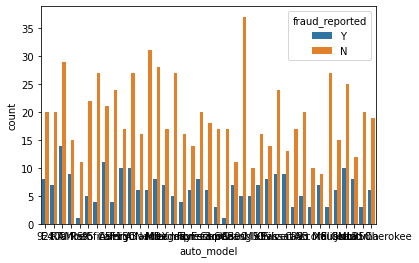

In [218]:
check('auto_model')

we can drop this column also

In [219]:
df.drop(['auto_model','auto_year'],axis=1,inplace=True)

<AxesSubplot:xlabel='count', ylabel='policy_year'>

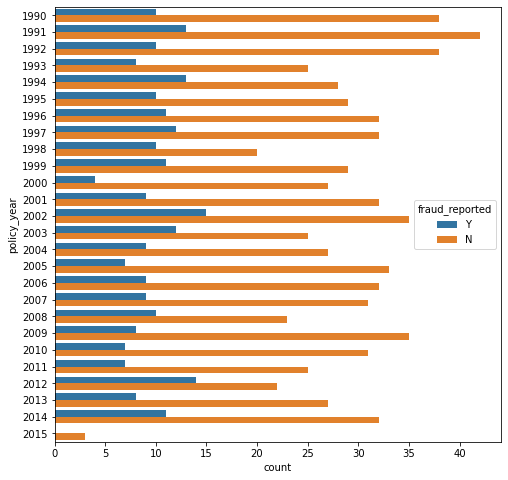

In [220]:
plt.figure(figsize=(8,8))
sns.countplot(y=df['policy_year'],hue=df['fraud_reported'])

Based on the number of years of policy also there is a little chance of predicting fraudulent,

let us calculate years, in that column from 2015

In [221]:
df['policy_year']=2015-df['policy_year']

In [222]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported', 'policy_year',
       'policy_day', 'policy_month'],
      dtype='object')

droping policy day and month

In [223]:
df.drop(['policy_day','policy_month'],axis=1,inplace=True)

In [224]:
df.drop('policy_csl',axis=1,inplace=True)

unique values in fraud_reported is: 2
unique values in fraud_reported is: N    753
Y    247
Name: fraud_reported, dtype: int64


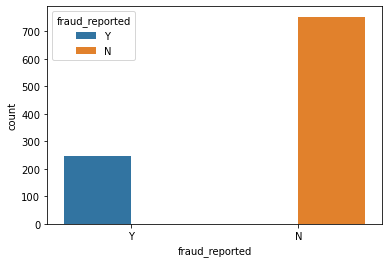

In [225]:
check('fraud_reported')


24.7% of claims are fraudulent.it is a huge loss to the insurer company

In [226]:
df['fraud_reported']=le.fit_transform(df['fraud_reported'])

In [227]:
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [228]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available          int32
total_claim_amount       

In [229]:
#brief stats
df.describe()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,policy_year
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,1136.000000,1256.406150,1.101000e+06,0.463000,2.966000,6.653000,9.731000,2.416000,25126.100000,26793.700000,1.172000,1.022000,1.184000,2.167000,3.242000,2.966000,11.644000,1.83900,0.662000,0.992000,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,0.247000,13.396000
std,115.113174,9.140287,0.83096,611.864673,244.167395,2.297407e+06,0.498879,1.948497,4.019048,5.674049,1.681003,27872.187708,28104.096686,1.081474,0.728043,0.939695,1.532142,2.155942,2.044266,6.951373,1.01888,0.473265,0.820127,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,0.431483,7.360391
min,0.000000,19.000000,0.00000,500.000000,433.330000,-1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000
25%,115.750000,32.000000,0.00000,500.000000,1089.607500,0.000000e+00,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,6.000000,1.00000,0.000000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,0.000000,7.000000
50%,199.500000,38.000000,1.00000,1000.000000,1257.200000,0.000000e+00,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,23250.000000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,12.000000,1.00000,1.000000,1.000000,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,0.000000,13.000000
75%,276.250000,44.000000,2.00000,2000.000000,1415.695000,0.000000e+00,1.000000,5.000000,10.000000,15.000000,4.000000,51025.000000,51500.000000,2.000000,2.000000,2.000000,4.000000,5.000000,5.000000,17.000000,3.00000,1.000000,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,0.000000,20.000000
max,479.000000,64.000000,2.00000,2000.000000,2047.590000,1.000000e+07,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,111100.000000,3.000000,2.000000,3.000000,4.000000,6.000000,6.000000,23.000000,4.00000,1.000000,2.000000,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,1.000000,25.000000


In [230]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                   0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage               -0.685977
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728


In [231]:
#removing outliers
from scipy.stats import zscore
z=abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new.shape

(980, 31)

In [232]:
1-(980/1000)

0.020000000000000018

there is a loss of 2% data acceptable

In [233]:
df_new.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                   0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage               -0.691993
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221


still there is skewness in some columns, lets remove it

1.5847791899208252

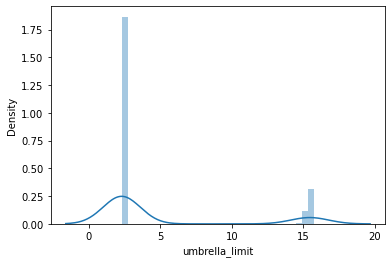

In [234]:
df_new['umbrella_limit']=np.log(df_new['umbrella_limit']+10)
sns.distplot(df_new['umbrella_limit'])
df_new['umbrella_limit'].skew()

0.5366256297467658

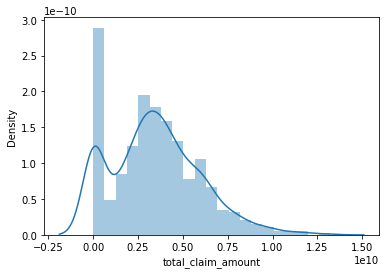

In [235]:
df_new['total_claim_amount']=np.square(df_new['total_claim_amount'])
sns.distplot(df_new['total_claim_amount'])
df_new['total_claim_amount'].skew()

0.48271142893742414

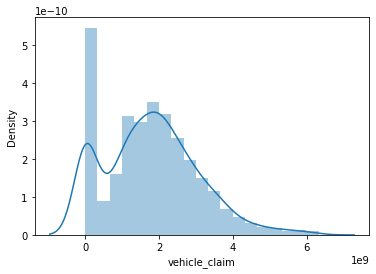

In [236]:
df_new['vehicle_claim']=np.square(df_new['vehicle_claim']+1)
sns.distplot(df_new['vehicle_claim'])
df_new['vehicle_claim'].skew()

In [237]:
#correlation
cor=round(df_new.corr(),1)
cor

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,policy_year
months_as_customer,1.0,0.9,-0.0,0.0,-0.0,0.0,0.1,-0.0,0.0,-0.1,0.1,0.0,-0.0,-0.0,-0.1,-0.1,0.0,0.0,-0.0,0.1,0.0,-0.0,-0.0,0.1,-0.0,0.1,0.1,0.0,0.1,0.0,0.0
age,0.9,1.0,-0.0,0.0,0.0,-0.0,0.1,0.0,0.0,-0.1,0.1,-0.0,-0.0,-0.0,-0.1,-0.1,0.0,0.0,-0.0,0.1,0.0,-0.0,-0.0,0.1,-0.0,0.1,0.1,0.1,0.1,0.0,0.0
policy_state,-0.0,-0.0,1.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.1,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.1,-0.0,-0.0,-0.0,-0.0,0.0,0.0
policy_deductable,0.0,0.0,0.0,1.0,-0.0,0.0,-0.0,0.0,-0.1,-0.0,-0.0,0.0,0.0,-0.0,-0.1,-0.0,0.0,0.0,-0.0,0.1,0.0,0.0,-0.0,0.1,0.0,0.0,0.0,0.1,-0.0,0.0,0.1
policy_annual_premium,-0.0,0.0,0.0,-0.0,1.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.1,0.0,-0.0,-0.1,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
umbrella_limit,0.0,-0.0,-0.0,0.0,-0.0,1.0,0.0,-0.0,0.0,-0.0,0.1,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.1,0.0,-0.0,-0.0,-0.0,0.1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.1,-0.1
insured_sex,0.1,0.1,-0.0,-0.0,0.0,0.0,1.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
insured_education_level,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,1.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.1,0.0,-0.1,-0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.0,-0.0
insured_occupation,0.0,0.0,-0.0,-0.1,0.0,0.0,-0.0,-0.0,1.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
insured_hobbies,-0.1,-0.1,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,1.0,-0.1,0.1,0.0,0.0,0.0,-0.0,-0.0,0.1,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0


<AxesSubplot:>

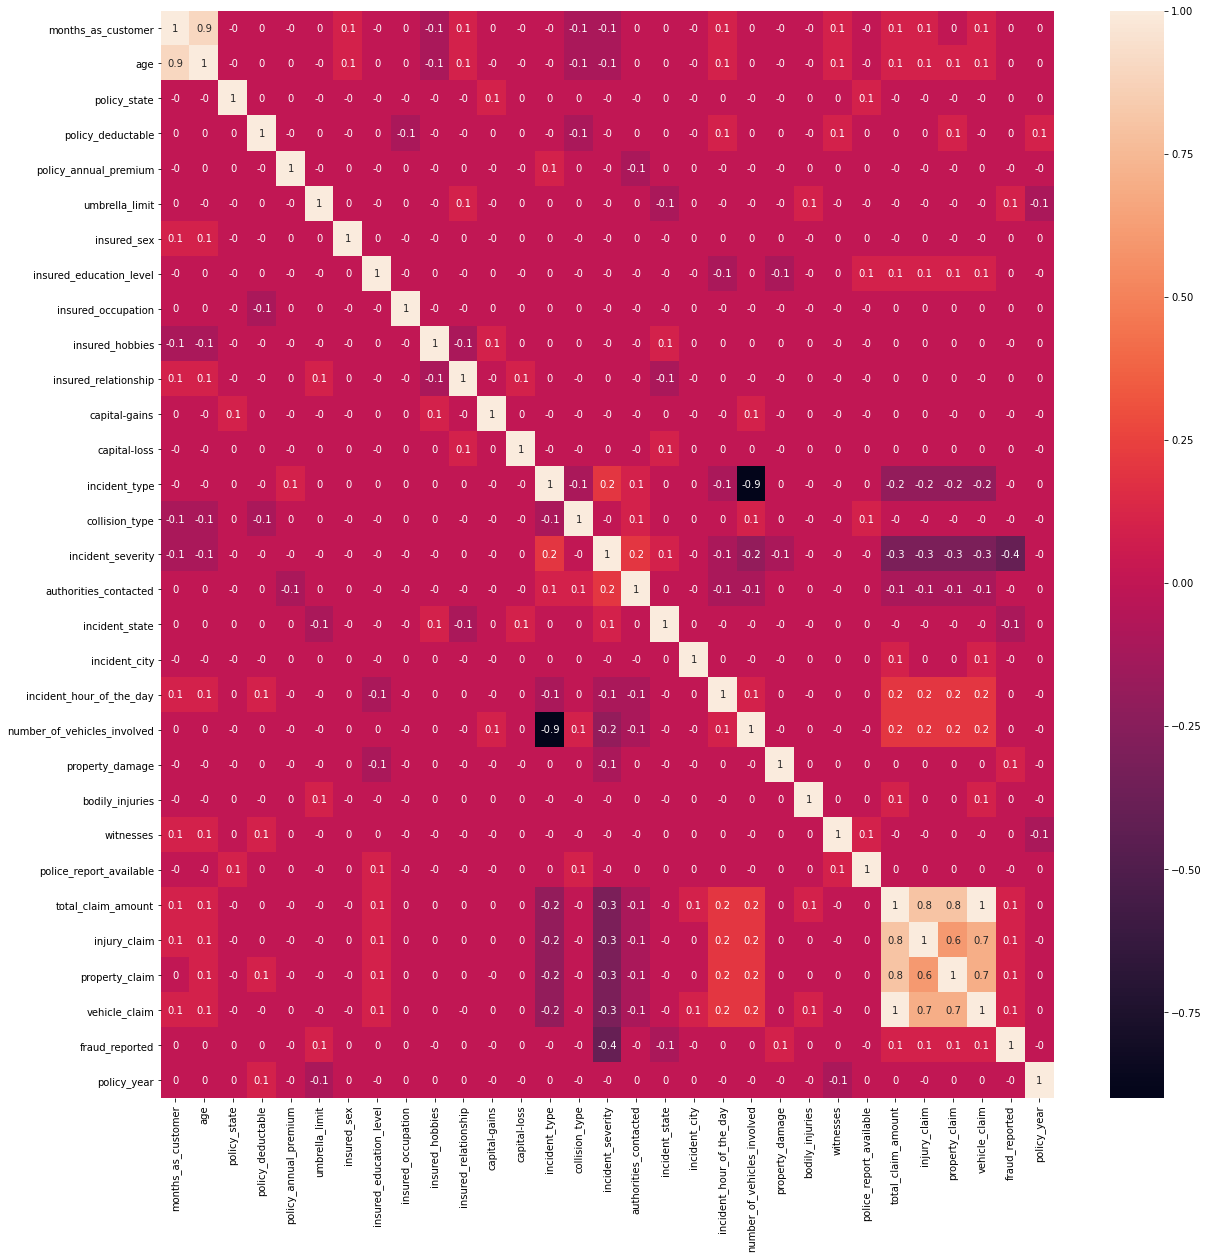

In [238]:
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True)

observations: Months as customer and age are correlated,we can drop column age incident severity and authorities contacted are corlatred, we will drop authorities as it has less impact on the fraud finding total claim is correlated to injury, vehicle and property claims, so we will drop those three columns

In [239]:
df_new.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported', 'policy_year'],
      dtype='object')

In [240]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           980 non-null    int64  
 1   age                          980 non-null    int64  
 2   policy_state                 980 non-null    int32  
 3   policy_deductable            980 non-null    int64  
 4   policy_annual_premium        980 non-null    float64
 5   umbrella_limit               979 non-null    float64
 6   insured_sex                  980 non-null    int32  
 7   insured_education_level      980 non-null    int32  
 8   insured_occupation           980 non-null    int32  
 9   insured_hobbies              980 non-null    int32  
 10  insured_relationship         980 non-null    int32  
 11  capital-gains                980 non-null    int64  
 12  capital-loss                 980 non-null    int64  
 13  incident_type       

In [241]:
df_new.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.584779
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                   0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage               -0.691993
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221


removing some unwanted columns

In [242]:
df_new=df_new.drop(['age','injury_claim','property_claim','vehicle_claim','authorities_contacted','insured_occupation','incident_type','policy_deductable','insured_relationship','capital-gains','capital-loss','umbrella_limit'],axis=1)

In [243]:
df_new.shape

(980, 19)

In [244]:
x=df_new.drop('fraud_reported',axis=1)
y=df_new['fraud_reported']

In [245]:
x.shape

(980, 18)

In [246]:
y.shape

(980,)

In [247]:
#scaling the x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [248]:
#Balancing the dataset
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_balanced,y_balanced=smt.fit_resample(x_scaled,y)

In [251]:
#Let us import and split x y at best random state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split

lo=LogisticRegression()
rs=0
acsc=0

for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x_balanced,y_balanced,test_size=0.2,random_state=i)
    lo.fit(x_train,y_train)
    pred=lo.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>acsc:
        acsc=acc
        rs=i
print(f'Best score:{acsc}\n random state: {rs}')

Best score:0.8040540540540541
 random state: 119


In [252]:
x_train,x_test,y_train,y_test=train_test_split(x_balanced,y_balanced,test_size=0.2,random_state=119)

In [253]:
#importing other models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [254]:
models=[LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),KNeighborsClassifier()]
for m in models:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(f'{m}:')
    print('accuracy score:',accuracy_score(y_test,predm))
    print('confusion matrix:\n',confusion_matrix(y_test,predm))
    print('classification report:\n',classification_report(y_test,predm))
    cvscore=cross_val_score(m,x_balanced,y_balanced,cv=5)
    print('mean cv score:',cvscore.mean())
    print('\n')

LogisticRegression():
accuracy score: 0.8040540540540541
confusion matrix:
 [[116  34]
 [ 24 122]]
classification report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       150
           1       0.78      0.84      0.81       146

    accuracy                           0.80       296
   macro avg       0.81      0.80      0.80       296
weighted avg       0.81      0.80      0.80       296

mean cv score: 0.7405405405405405


SVC():
accuracy score: 0.8783783783783784
confusion matrix:
 [[128  22]
 [ 14 132]]
classification report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88       150
           1       0.86      0.90      0.88       146

    accuracy                           0.88       296
   macro avg       0.88      0.88      0.88       296
weighted avg       0.88      0.88      0.88       296

mean cv score: 0.8398648648648649


DecisionTreeClassifier():
accuracy score: 0

RF model is giving more accuracy i.e.93%

In [255]:
#Hyper parameter tuning of Ridge regression
from sklearn.model_selection import GridSearchCV

par={'n_estimators':range(100,500,100),'criterion':['gini','entropy'],'max_depth':range(0,10,5),'min_samples_split':range(2,20,4),
     'min_samples_leaf':range(1,5),'max_features':['auto']}

grid=GridSearchCV(RandomForestClassifier(),param_grid=par,verbose=2,n_jobs=1)
grid.fit(x_train,y_train)
print("Best score:",grid.best_score_)
print("Best estimator:",grid.best_estimator_)
print("Best parameters:",grid.best_params_)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time

In [256]:
rf=RandomForestClassifier(criterion='gini', max_depth=100, min_samples_leaf=3,
                       min_samples_split=5,max_features='auto',n_estimators=100,random_state=400)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy:',accuracy_score(y_test,pred))
print('confusion matrix:',confusion_matrix(y_test,pred))
print('classification report:',classification_report(y_test,pred))

accuracy: 0.9054054054054054
confusion matrix: [[133  17]
 [ 11 135]]
classification report:               precision    recall  f1-score   support

           0       0.92      0.89      0.90       150
           1       0.89      0.92      0.91       146

    accuracy                           0.91       296
   macro avg       0.91      0.91      0.91       296
weighted avg       0.91      0.91      0.91       296



In [257]:
results=pd.DataFrame({'Actual':y_test,'Predicted':pred})
results

,Actual,Predicted
1307,1,1
1392,1,1
1294,1,1
337,0,0
710,0,0
...,...,...
1030,1,1
92,0,0
747,1,1
614,0,0


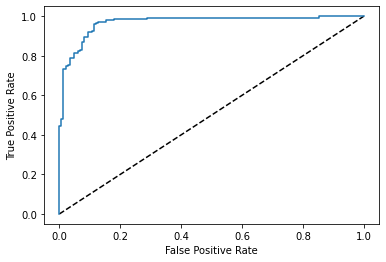

Score: 0.905662100456621


In [258]:
#Auc Roc curve
from sklearn.metrics import roc_auc_score
#Predicting the probability of having 0 in the x-test
y_pred_prob=rf.predict_proba(x_test)[:,1]
y_pred_prob

#Visualising
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print('Score:',auc_score)

In [259]:
#Saving the model
import joblib
joblib.dump(rf,'insurance_fraud.obj')

['insurance_fraud.obj']